In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
print("executed")

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
dataset_path = "C:\\Users\\DELL\\Desktop\\archive"

# Define the training and testing directories
train_dir = os.path.join(dataset_path, "C:\\Users\\DELL\\Desktop\\archive\\Training")
test_dir = os.path.join(dataset_path, "C:\\Users\\DELL\\Desktop\\archive\\Testing")

# Define the categories
categories = ["glioma", "meningioma", "notumor", "pituitary"]

In [3]:
# Set the image size
image_size = (150, 150)

# Set the batch size for training
batch_size = 32

# Set the number of epochs for training
epochs = 50

In [4]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.4406 - loss: 1.1487 - val_accuracy: 0.5430 - val_loss: 1.2172
Epoch 2/50
  1/178 ━━━━━━━━━━━━━━━━━━━━ 1:30 510ms/step - accuracy: 0.6250 - loss: 0.8163

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


178/178 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.6250 - loss: 0.8163 - val_accuracy: 0.5297 - val_loss: 1.2413
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 131s 737ms/step - accuracy: 0.6887 - loss: 0.7608 - val_accuracy: 0.5641 - val_loss: 1.2449
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.7500 - loss: 0.5966 - val_accuracy: 0.5562 - val_loss: 1.2964
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 138s 773ms/step - accuracy: 0.7495 - loss: 0.6433 - val_accuracy: 0.5992 - val_loss: 1.0471
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.7812 - loss: 0.7833 - val_accuracy: 0.6008 - val_loss: 1.0937
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 129s 722ms/step - accuracy: 0.7801 - loss: 0.5596 - val_accuracy: 0.6953 - val_loss: 0.7414
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.7500 - loss: 0.5299 - val_accuracy: 0.7289 - val_loss: 0.6757
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 163s 915ms/step - accuracy: 0.7824 - loss: 0.5457 - val_ac

In [8]:
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 303ms/step - accuracy: 0.9170 - loss: 0.2594
Test Loss: 0.20919016003608704
Test Accuracy: 0.9296875


41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 273ms/step


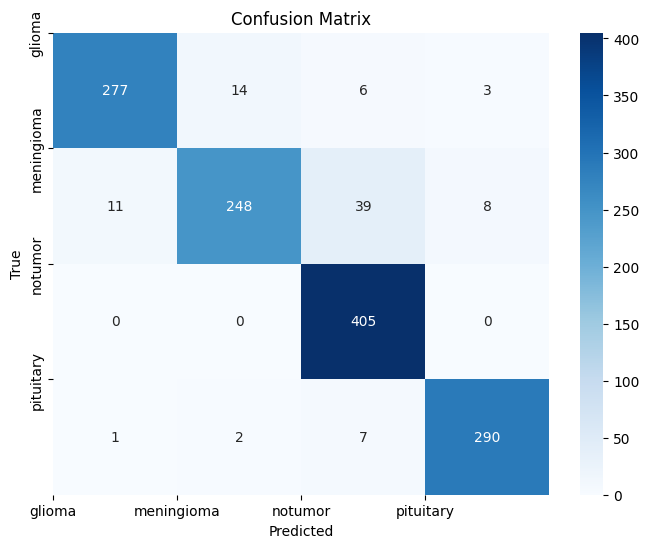

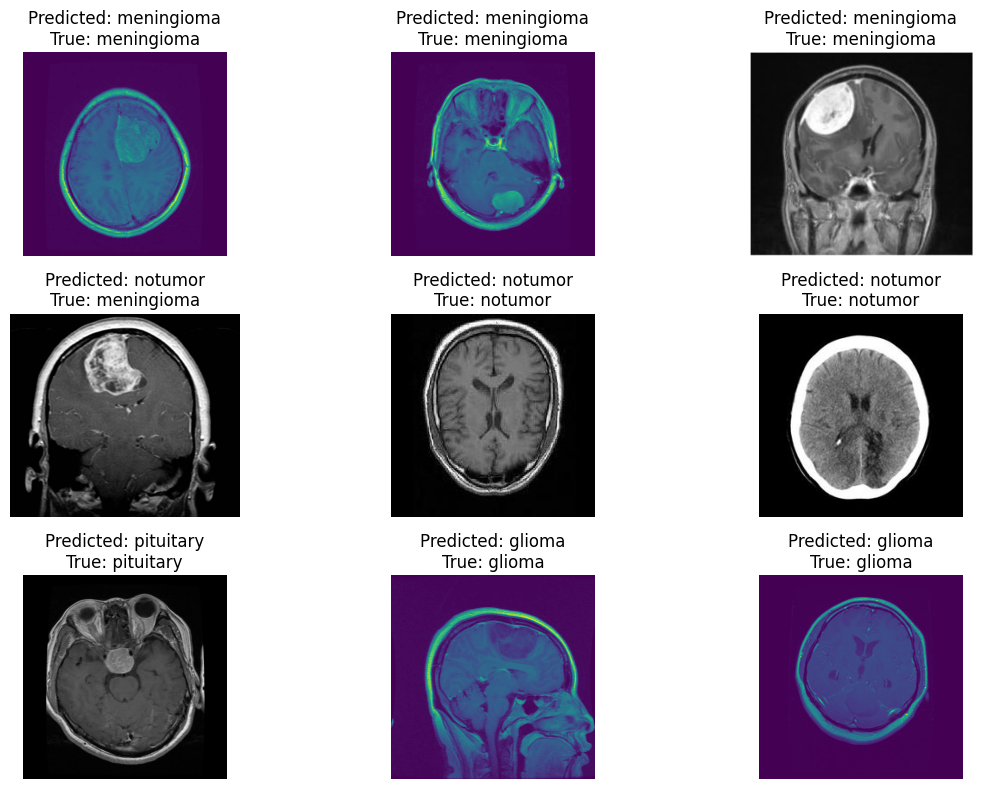

In [9]:
# Make predictions on the test dataset
predictions = model.predict(test_generator)
predicted_categories = np.argmax(predictions, axis=1)
true_categories = test_generator.classes

# Create a confusion matrix
confusion_matrix = tf.math.confusion_matrix(true_categories, predicted_categories)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.yticks(ticks=np.arange(len(categories)), labels=categories)
plt.show()

# Plot sample images with their predicted and true labels
test_images = test_generator.filenames
sample_indices = np.random.choice(range(len(test_images)), size=9, replace=False)
sample_images = [test_images[i] for i in sample_indices]
sample_predictions = [categories[predicted_categories[i]] for i in sample_indices]
sample_true_labels = [categories[true_categories[i]] for i in sample_indices]

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

Class: glioma
Precision: 0.9584775086505191
Recall: 0.9233333333333333
F1-Score: 0.9405772495755518

Class: meningioma
Precision: 0.9393939393939394
Recall: 0.8104575163398693
F1-Score: 0.8701754385964913

Class: notumor
Precision: 0.8862144420131292
Recall: 1.0
F1-Score: 0.9396751740139212

Class: pituitary
Precision: 0.9634551495016611
Recall: 0.9666666666666667
F1-Score: 0.9650582362728785



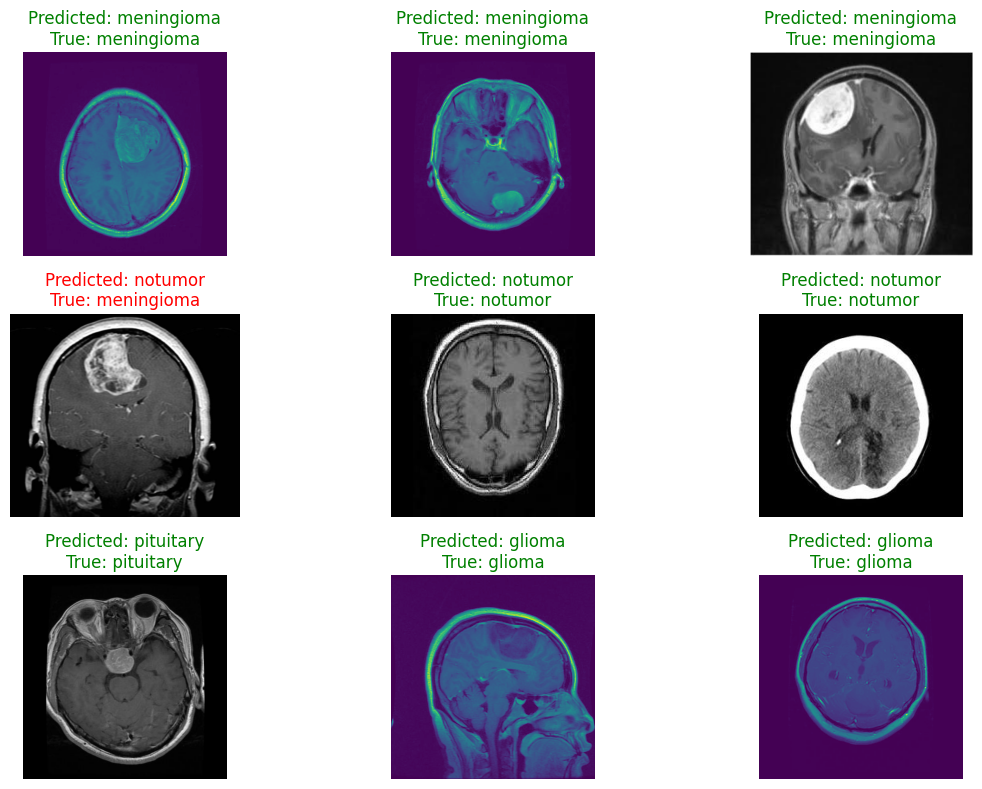

In [10]:
 
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1-score for each class
for i, category in enumerate(categories):
    print(f"Class: {category}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1-Score: {f1_score[i]}")
    print()

# Analyze the sample images and their predictions
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    if sample_predictions[i] == sample_true_labels[i]:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='green')
    else:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='red')
    plt.axis("off")
plt.tight_layout()
plt.show()

In [11]:


# Save the trained model
model.save("brain_tumor_detection_model.h5")

